### Manipulator Forward Dynamics (FD)

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from mujoco_parser import MuJoCoParserClass
print ("Done.")

Done.


### Simulate free-fall motion

In [2]:
env = MuJoCoParserClass(name='Panda',rel_path='../asset/panda/franka_panda.xml',VERBOSE=False)
env.init_viewer(TERMINATE_GLFW=True,window_width=0.5,window_height=0.5,cam_distance=3.0,cam_elevation=-45)
env.set_max_sec(max_sec=5.0)
sec_list = np.zeros(env.max_tick)
q_list   = np.zeros((env.max_tick,env.n_rev_joint))
while env.IS_ALIVE():
    env.step_and_render(render_speedup=1.0,RENDER_ALWAYS=False)
    env.print(print_every_sec=1.0,VERBOSE=1)
    # Append
    sec_list[env.tick-1] = env.get_sec_sim()
    q_list[env.tick-1,:] = env.get_q_rev()
print ("Done.")

Creating window glfw
tick:[1/2501], sec_wall:[0.211]sec, sec_sim:[0.002]sec
tick:[501/2501], sec_wall:[0.873]sec, sec_sim:[1.002]sec
tick:[1001/2501], sec_wall:[1.733]sec, sec_sim:[2.002]sec
tick:[1501/2501], sec_wall:[2.769]sec, sec_sim:[3.002]sec
tick:[2001/2501], sec_wall:[3.790]sec, sec_sim:[4.002]sec
tick:[2501/2501], sec_wall:[4.808]sec, sec_sim:[5.002]sec
Done.


In [3]:
env.terminate_viewer() # terminate viewer

Creating window glfw
Creating offscreen glfw


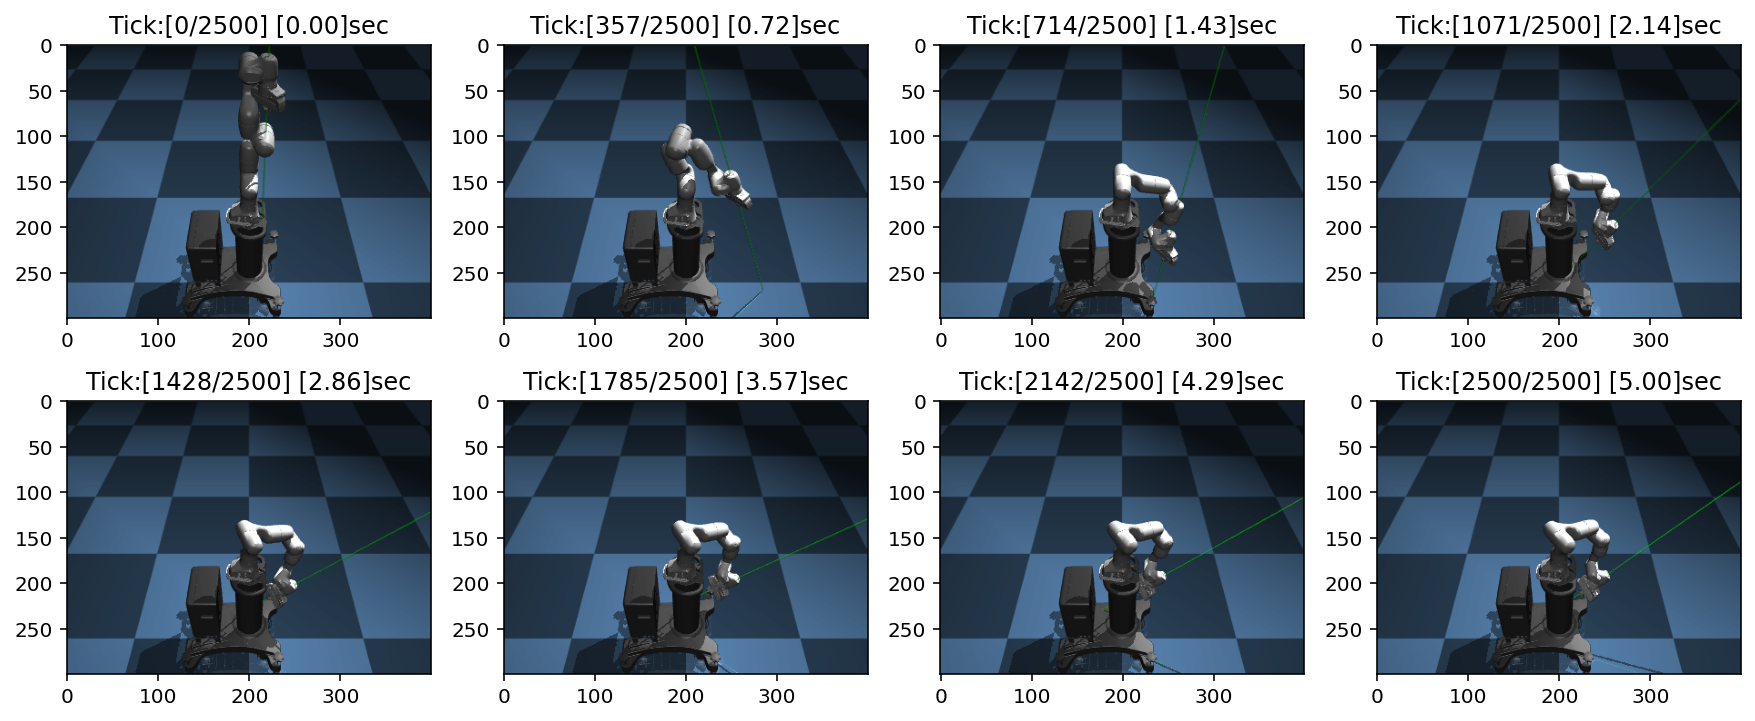

In [4]:
env.init_viewer(TERMINATE_GLFW=True,window_width=0.5,window_height=0.5)
fig = plt.figure(figsize=(15,6))
for idx,tick in enumerate(np.linspace(0,env.max_tick-1,8).astype(np.int32)):
    env.forward(q_rev=q_list[tick,:])
    img = env.plot_scene(render_w=400,render_h=300,
                         cam_distance=2.0,cam_elevation=-45,cam_lookat=[0,0,1.25],NO_PLOT=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('Tick:[%d/%d] [%.2f]sec'%(tick,env.max_tick-1,sec_list[tick]),fontsize=12)